# My mood in 2019 (According to Spotify)
## To get the data: 
## https://towardsdatascience.com/get-your-spotify-streaming-history-with-python-d5a208bbcbd3

In [2]:
from collections import namedtuple
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font='georgia')
sns.set_style("ticks")

In [10]:
# Extraction process. Done with the help of main.py, history.py, and config.py to get the 
# extracted data from the Spotify API with pythons spotipy library: request, asl, and etc..

df = pd.read_csv('output/final.csv', index_col = 0)
df.shape[0]
df

,name,endTime,artistName,trackName,msPlayed,datetime,danceability,energy,key,loudness,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,albumName,albumID,track Number
0,Problems___Don Diablo,2021-07-10 04:52,Don Diablo,Problems,9972,2021-07-10 04:52:00,0.721,0.768,3.0,-4.371,...,audio_features,2dyrLrVopYKGc3H9oOYSmZ,spotify:track:2dyrLrVopYKGc3H9oOYSmZ,https://api.spotify.com/v1/tracks/2dyrLrVopYKG...,https://api.spotify.com/v1/audio-analysis/2dyr...,179032.0,4.0,Problems,6L2C3wz8KVARtC4wqrDJTG,4
1,Back In Time___Marshmello,2021-07-10 04:56,Marshmello,Back In Time,160877,2021-07-10 04:56:00,0.783,0.824,1.0,-4.558,...,audio_features,23YTJTopRwkkeX6QGsEaKc,spotify:track:23YTJTopRwkkeX6QGsEaKc,https://api.spotify.com/v1/tracks/23YTJTopRwkk...,https://api.spotify.com/v1/audio-analysis/23YT...,160877.0,4.0,Shockwave,6yXPyhVxt3PHBwkinPFn6I,1149
2,Head & Heart (feat. MNEK)___Joel Corry,2021-07-10 05:00,Joel Corry,Head & Heart (feat. MNEK),166028,2021-07-10 05:00:00,0.734,0.874,8.0,-3.158,...,audio_features,6cx06DFPPHchuUAcTxznu9,spotify:track:6cx06DFPPHchuUAcTxznu9,https://api.spotify.com/v1/tracks/6cx06DFPPHch...,https://api.spotify.com/v1/audio-analysis/6cx0...,166028.0,4.0,Head & Heart (feat. MNEK),5glfCPECXSHzidU6exW8wO,256
3,Down For The Ride___ItaloBrothers,2021-07-10 05:04,ItaloBrothers,Down For The Ride,160593,2021-07-10 05:04:00,0.705,0.730,4.0,-4.778,...,audio_features,0L8NzGlH4nmnbOUSg4gO72,spotify:track:0L8NzGlH4nmnbOUSg4gO72,https://api.spotify.com/v1/tracks/0L8NzGlH4nmn...,https://api.spotify.com/v1/audio-analysis/0L8N...,160594.0,4.0,Down For The Ride,54h5f6arTVEerecJIR9g84,650
4,Take Control___KREAM,2021-07-10 05:19,KREAM,Take Control,27041,2021-07-10 05:19:00,0.676,0.900,6.0,-6.469,...,audio_features,4NPkQtN5w0T4ju8T6mYVsJ,spotify:track:4NPkQtN5w0T4ju8T6mYVsJ,https://api.spotify.com/v1/tracks/4NPkQtN5w0T4...,https://api.spotify.com/v1/audio-analysis/4NPk...,167846.0,4.0,Take Control,5Lm6ONdbKjUFkM4h4Stgu7,1105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4513,Pray For Me___The Weeknd,2022-07-05 17:52,The Weeknd,Pray For Me,5596,2022-07-05 17:52:00,0.732,0.678,2.0,-4.977,...,audio_features,6huNf4dutXRjJyGn7f5BPS,spotify:track:6huNf4dutXRjJyGn7f5BPS,https://api.spotify.com/v1/tracks/6huNf4dutXRj...,https://api.spotify.com/v1/audio-analysis/6huN...,211421.0,4.0,The Highlights,5L5evi5tJPh8WaEFAQp7Tp,1284
4514,Barking___Ramz,2022-07-05 17:52,Ramz,Barking,3784,2022-07-05 17:52:00,0.450,0.465,7.0,-7.867,...,audio_features,2U5cq89GCnsR1yixKkC8d5,spotify:track:2U5cq89GCnsR1yixKkC8d5,https://api.spotify.com/v1/tracks/2U5cq89GCnsR...,https://api.spotify.com/v1/audio-analysis/2U5c...,202827.0,3.0,Barking,0pgmZ0HKZYEIr71WHdaMN7,766
4515,Keep It Mello (feat. Omar LinX)___Omar LinX,2022-07-05 17:56,Omar LinX,Keep It Mello (feat. Omar LinX),243380,2022-07-05 17:56:00,0.686,0.888,1.0,-3.348,...,audio_features,0Q3SC6kEhxYagDP3bFe5K9,spotify:track:0Q3SC6kEhxYagDP3bFe5K9,https://api.spotify.com/v1/tracks/0Q3SC6kEhxYa...,https://api.spotify.com/v1/audio-analysis/0Q3S...,243380.0,4.0,Joytime,6opKASPALOkPwCfHvqIS9H,853
4516,Kamikaze___Eminem,2022-07-05 17:58,Eminem,Kamikaze,25983,2022-07-05 17:58:00,0.876,0.786,10.0,-4.884,...,audio_features,60SdxE8apGAxMiRrpbmLY0,spotify:track:60SdxE8apGAxMiRrpbmLY0,https://api.spotify.com/v1/tracks/60SdxE8apGAx...,https://api.spotify.com/v1/audio-analysis/60Sd...,244679.0,4.0,Kamikaze,3HNnxK7NgLXbDoxRZxNWiR,402


In [11]:
#tracks playing time

# Doing the Data cleaning process..
final_clean = df

final_clean['secPlayed'] = final_clean['msPlayed'] / 1000 # adding a column that checks the seconds played from minutes. 
final_clean = final_clean[final_clean.columns[:-1].insert(4, final_clean.columns[-1])] #moving seconds column to proper place
final_clean = final_clean[final_clean.secPlayed > 60] #removing songs that were played for less than 60 secs 

# Save this into clean data format. Produce clean data file of the final.csv

final_clean.to_csv('output/final_clean.csv')


final_clean.shape[0]
final_clean

,name,endTime,artistName,trackName,secPlayed,msPlayed,datetime,danceability,energy,key,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,albumName,albumID,track Number
1,Back In Time___Marshmello,2021-07-10 04:56,Marshmello,Back In Time,160.877,160877,2021-07-10 04:56:00,0.783,0.8240,1.0,...,audio_features,23YTJTopRwkkeX6QGsEaKc,spotify:track:23YTJTopRwkkeX6QGsEaKc,https://api.spotify.com/v1/tracks/23YTJTopRwkk...,https://api.spotify.com/v1/audio-analysis/23YT...,160877.0,4.0,Shockwave,6yXPyhVxt3PHBwkinPFn6I,1149
2,Head & Heart (feat. MNEK)___Joel Corry,2021-07-10 05:00,Joel Corry,Head & Heart (feat. MNEK),166.028,166028,2021-07-10 05:00:00,0.734,0.8740,8.0,...,audio_features,6cx06DFPPHchuUAcTxznu9,spotify:track:6cx06DFPPHchuUAcTxznu9,https://api.spotify.com/v1/tracks/6cx06DFPPHch...,https://api.spotify.com/v1/audio-analysis/6cx0...,166028.0,4.0,Head & Heart (feat. MNEK),5glfCPECXSHzidU6exW8wO,256
3,Down For The Ride___ItaloBrothers,2021-07-10 05:04,ItaloBrothers,Down For The Ride,160.593,160593,2021-07-10 05:04:00,0.705,0.7300,4.0,...,audio_features,0L8NzGlH4nmnbOUSg4gO72,spotify:track:0L8NzGlH4nmnbOUSg4gO72,https://api.spotify.com/v1/tracks/0L8NzGlH4nmn...,https://api.spotify.com/v1/audio-analysis/0L8N...,160594.0,4.0,Down For The Ride,54h5f6arTVEerecJIR9g84,650
5,Losin' Sleep___David Archuleta,2021-07-12 23:05,David Archuleta,Losin' Sleep,162.407,162407,2021-07-12 23:05:00,0.866,0.4980,1.0,...,audio_features,1cRG2cmtDHH98FhL5vIDHk,spotify:track:1cRG2cmtDHH98FhL5vIDHk,https://api.spotify.com/v1/tracks/1cRG2cmtDHH9...,https://api.spotify.com/v1/audio-analysis/1cRG...,163873.0,4.0,Losin' Sleep,0ciBkpOLIq8b2TWkLTygp2,1108
6,Something 'Bout Love___David Archuleta,2021-07-12 23:10,David Archuleta,Something 'Bout Love,262.266,262266,2021-07-12 23:10:00,0.587,0.7230,5.0,...,audio_features,25pU0SsW1StdsEQbsFC7qP,spotify:track:25pU0SsW1StdsEQbsFC7qP,https://api.spotify.com/v1/tracks/25pU0SsW1Std...,https://api.spotify.com/v1/audio-analysis/25pU...,262267.0,4.0,The Other Side of Down,6rdS6blx059zgT2vEtRnpI,238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4510,Empty Streets___M e a d o w,2022-06-30 17:29,M e a d o w,Empty Streets,123.000,123000,2022-06-30 17:29:00,0.722,0.2080,1.0,...,audio_features,3gwg9ZOrqn9F49shmvtGqT,spotify:track:3gwg9ZOrqn9F49shmvtGqT,https://api.spotify.com/v1/tracks/3gwg9ZOrqn9F...,https://api.spotify.com/v1/audio-analysis/3gwg...,123000.0,4.0,Days Of Tomorrow,4ovR9wO7d3JhdhPlPtyRtH,43
4511,"I love you, sorry___Kinissue",2022-06-30 17:33,Kinissue,"I love you, sorry",159.630,159630,2022-06-30 17:33:00,0.623,0.0878,7.0,...,audio_features,7lffRc6oTehzJsFZGHZVNU,spotify:track:7lffRc6oTehzJsFZGHZVNU,https://api.spotify.com/v1/tracks/7lffRc6oTehz...,https://api.spotify.com/v1/audio-analysis/7lff...,159631.0,4.0,Imperfect,3M11MV9Cuj7qxgiUC3uoeF,1076
4512,Lullaby___Osaki,2022-06-30 18:16,Osaki,Lullaby,94.479,94479,2022-06-30 18:16:00,0.849,0.1900,7.0,...,audio_features,1K1b1rPjbbam1NXUPg4VrK,spotify:track:1K1b1rPjbbam1NXUPg4VrK,https://api.spotify.com/v1/tracks/1K1b1rPjbbam...,https://api.spotify.com/v1/audio-analysis/1K1b...,200880.0,3.0,Lullaby,2cVJ0gO2QyBC5o2A1DVFuk,1188
4515,Keep It Mello (feat. Omar LinX)___Omar LinX,2022-07-05 17:56,Omar LinX,Keep It Mello (feat. Omar LinX),243.380,243380,2022-07-05 17:56:00,0.686,0.8880,1.0,...,audio_features,0Q3SC6kEhxYagDP3bFe5K9,spotify:track:0Q3SC6kEhxYagDP3bFe5K9,https://api.spotify.com/v1/tracks/0Q3SC6kEhxYa...,https://api.spotify.com/v1/audio-analysis/0Q3S...,243380.0,4.0,Joytime,6opKASPALOkPwCfHvqIS9H,853


In [12]:
percent_cleaned = round(final_clean.shape[0] / df.shape[0] * 100, 2)
percent_cleaned

79.39

In [9]:
#outputting the contents of the current cell
final_clean.head()

,name,endTime,artistName,trackName,secPlayed,msPlayed,datetime,danceability,energy,key,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,albumName,albumID,track Number
1,Back In Time___Marshmello,2021-07-10 04:56,Marshmello,Back In Time,160.877,160877,2021-07-10 04:56:00,0.783,0.824,1.0,...,audio_features,23YTJTopRwkkeX6QGsEaKc,spotify:track:23YTJTopRwkkeX6QGsEaKc,https://api.spotify.com/v1/tracks/23YTJTopRwkk...,https://api.spotify.com/v1/audio-analysis/23YT...,160877.0,4.0,Shockwave,6yXPyhVxt3PHBwkinPFn6I,1149
2,Head & Heart (feat. MNEK)___Joel Corry,2021-07-10 05:00,Joel Corry,Head & Heart (feat. MNEK),166.028,166028,2021-07-10 05:00:00,0.734,0.874,8.0,...,audio_features,6cx06DFPPHchuUAcTxznu9,spotify:track:6cx06DFPPHchuUAcTxznu9,https://api.spotify.com/v1/tracks/6cx06DFPPHch...,https://api.spotify.com/v1/audio-analysis/6cx0...,166028.0,4.0,Head & Heart (feat. MNEK),5glfCPECXSHzidU6exW8wO,256
3,Down For The Ride___ItaloBrothers,2021-07-10 05:04,ItaloBrothers,Down For The Ride,160.593,160593,2021-07-10 05:04:00,0.705,0.730,4.0,...,audio_features,0L8NzGlH4nmnbOUSg4gO72,spotify:track:0L8NzGlH4nmnbOUSg4gO72,https://api.spotify.com/v1/tracks/0L8NzGlH4nmn...,https://api.spotify.com/v1/audio-analysis/0L8N...,160594.0,4.0,Down For The Ride,54h5f6arTVEerecJIR9g84,650
5,Losin' Sleep___David Archuleta,2021-07-12 23:05,David Archuleta,Losin' Sleep,162.407,162407,2021-07-12 23:05:00,0.866,0.498,1.0,...,audio_features,1cRG2cmtDHH98FhL5vIDHk,spotify:track:1cRG2cmtDHH98FhL5vIDHk,https://api.spotify.com/v1/tracks/1cRG2cmtDHH9...,https://api.spotify.com/v1/audio-analysis/1cRG...,163873.0,4.0,Losin' Sleep,0ciBkpOLIq8b2TWkLTygp2,1108
6,Something 'Bout Love___David Archuleta,2021-07-12 23:10,David Archuleta,Something 'Bout Love,262.266,262266,2021-07-12 23:10:00,0.587,0.723,5.0,...,audio_features,25pU0SsW1StdsEQbsFC7qP,spotify:track:25pU0SsW1StdsEQbsFC7qP,https://api.spotify.com/v1/tracks/25pU0SsW1Std...,https://api.spotify.com/v1/audio-analysis/25pU...,262267.0,4.0,The Other Side of Down,6rdS6blx059zgT2vEtRnpI,238


In [25]:
#identifying the month
final_clean['month'] = final_clean.endTime.str.split('-').apply(lambda x: (x[0], x[1]))
final_clean.head()

,name,endTime,artistName,trackName,time_signature,albumName,albumID,track Number,secPlayed,msPlayed,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,month
1,Back In Time___Marshmello,2021-07-10 04:56,Marshmello,Back In Time,4.0,Shockwave,6yXPyhVxt3PHBwkinPFn6I,1149,160.877,160877,...,0.0748,0.413,139.998,audio_features,23YTJTopRwkkeX6QGsEaKc,spotify:track:23YTJTopRwkkeX6QGsEaKc,https://api.spotify.com/v1/tracks/23YTJTopRwkk...,https://api.spotify.com/v1/audio-analysis/23YT...,160877.0,"(2021, 07)"
2,Head & Heart (feat. MNEK)___Joel Corry,2021-07-10 05:00,Joel Corry,Head & Heart (feat. MNEK),4.0,Head & Heart (feat. MNEK),5glfCPECXSHzidU6exW8wO,256,166.028,166028,...,0.0489,0.905,122.953,audio_features,6cx06DFPPHchuUAcTxznu9,spotify:track:6cx06DFPPHchuUAcTxznu9,https://api.spotify.com/v1/tracks/6cx06DFPPHch...,https://api.spotify.com/v1/audio-analysis/6cx0...,166028.0,"(2021, 07)"
3,Down For The Ride___ItaloBrothers,2021-07-10 05:04,ItaloBrothers,Down For The Ride,4.0,Down For The Ride,54h5f6arTVEerecJIR9g84,650,160.593,160593,...,0.2940,0.616,125.975,audio_features,0L8NzGlH4nmnbOUSg4gO72,spotify:track:0L8NzGlH4nmnbOUSg4gO72,https://api.spotify.com/v1/tracks/0L8NzGlH4nmn...,https://api.spotify.com/v1/audio-analysis/0L8N...,160594.0,"(2021, 07)"
5,Losin' Sleep___David Archuleta,2021-07-12 23:05,David Archuleta,Losin' Sleep,4.0,Losin' Sleep,0ciBkpOLIq8b2TWkLTygp2,1108,162.407,162407,...,0.1460,0.423,143.967,audio_features,1cRG2cmtDHH98FhL5vIDHk,spotify:track:1cRG2cmtDHH98FhL5vIDHk,https://api.spotify.com/v1/tracks/1cRG2cmtDHH9...,https://api.spotify.com/v1/audio-analysis/1cRG...,163873.0,"(2021, 07)"
6,Something 'Bout Love___David Archuleta,2021-07-12 23:10,David Archuleta,Something 'Bout Love,4.0,The Other Side of Down,6rdS6blx059zgT2vEtRnpI,238,262.266,262266,...,0.1670,0.423,120.041,audio_features,25pU0SsW1StdsEQbsFC7qP,spotify:track:25pU0SsW1StdsEQbsFC7qP,https://api.spotify.com/v1/tracks/25pU0SsW1Std...,https://api.spotify.com/v1/audio-analysis/25pU...,262267.0,"(2021, 07)"


In [27]:
#listing months and features
months = list(set(final_clean.month.values))
months.sort()
features = ['danceability', 'energy', 'speechiness', 'instrumentalness', 'valence']
final_clean['energy']

1       0.8240
2       0.8740
3       0.7300
5       0.4980
6       0.7230
         ...  
4510    0.2080
4511    0.0878
4512    0.1900
4515    0.8880
4517    0.8810
Name: energy, Length: 3587, dtype: float64

In [29]:
#standardizing features (we're interested not in their absolute value, but in how each changed over time)
for feature in features:
    # the formula to deal with how things changed over time. formula used here is converting the metrics to z-score distribution
    #  The z-score distribution is based on normalizing/ standarditing the  features used 
    
    
    #  Parameters used:
    #     - final_clean[feature] --> a list of metrics for percents for each feature
    #     - final_clean[feature].mean() --> deals with the mean value of the percents
    #     - final_clean[feature].std() --> Calculate the standard distribution of the feature
    
    
    # Output Parameter :
    #     - final_clean[f'{feature}_zscore'] --> The z-score distribution of the feature
    
    
    # Formula Used ( in application to standardize the distribution )
    
    # z = p   - p(avg) / p (std)
    
    
    
    final_clean[f'{feature}_zscore'] = ( final_clean[feature] - final_clean[feature].mean() ) / final_clean[feature].std()

In [31]:
#making sure we standardized correctly: mean is 0 and std is 1

# Standarizing the values such that the mean of the : mean 0, std is 1

# This applies for each feature

final_clean[[feature + '_zscore' for feature in features]].describe().loc['mean':'std'].T

,mean,std
danceability_zscore,-3.898234e-14,1.0
energy_zscore,2.685062e-14,1.0
speechiness_zscore,-8.995066e-16,1.0
instrumentalness_zscore,4.478034e-16,1.0
valence_zscore,-7.129260e-15,1.0


In [36]:
#features averages by month

Month = namedtuple('Month', features) # tuple that deals with features
avg_features_months = [] # deal with avg features

# Deals with the month to month featues
for month in months:
    final_clean_month = final_clean[final_clean['month'] == month] # gets the months that match
    avg_features = final_clean_month.describe().loc['mean'][[feature + '_zscore' for feature in features]] #stores the data in the avg
    month = Month(*avg_features) # Gets the month to be the average
    avg_features_months.append(month) # adds the average of the months
    


In [37]:
#labelling months
month_labels = [f'{month[1]}/{month[0]}' for month in months] # stores a list of month by the year ( 09/ 2022) 
print(month_labels)
month_labels_short = [m[:3]+m[-2:] for m in month_labels] # deal with adding the strings of the months. to make it( 09/ 20)

['07/2021', '08/2021', '09/2021', '10/2021', '11/2021', '12/2021', '01/2022', '02/2022', '03/2022', '04/2022', '05/2022', '06/2022', '07/2022']


In [38]:
def features_sns(features):
    fig, ax = plt.subplots(figsize = (25,10))
    x = [x for x in range(13)]

    for feature in features:
        y = [getattr(month, feature) for month in avg_features_months]
        fig = sns.lineplot(x,y, label=feature, linewidth=6, alpha=.7, marker='o', markersize=15)
    
    ax.set_xticks([x for x in range(13)])
    ax.set_xticklabels(labels=month_labels_short, rotation=45, ha='right', size=30)

    for tick in ax.yaxis.get_major_ticks():
                tick.label.set_fontsize(30) 

    leg = ax.legend(loc = 'upper left', bbox_to_anchor=(1,1.03), prop={'size': 30})

    # get the individual lines inside legend and set line width
    for line in leg.get_lines():
        line.set_linewidth(10)
    
    ax.set_title('My mood in 2019 (According to Spotify)', size = 50, pad = 30, fontname = 'sans-serif')

    return ax

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/pyt

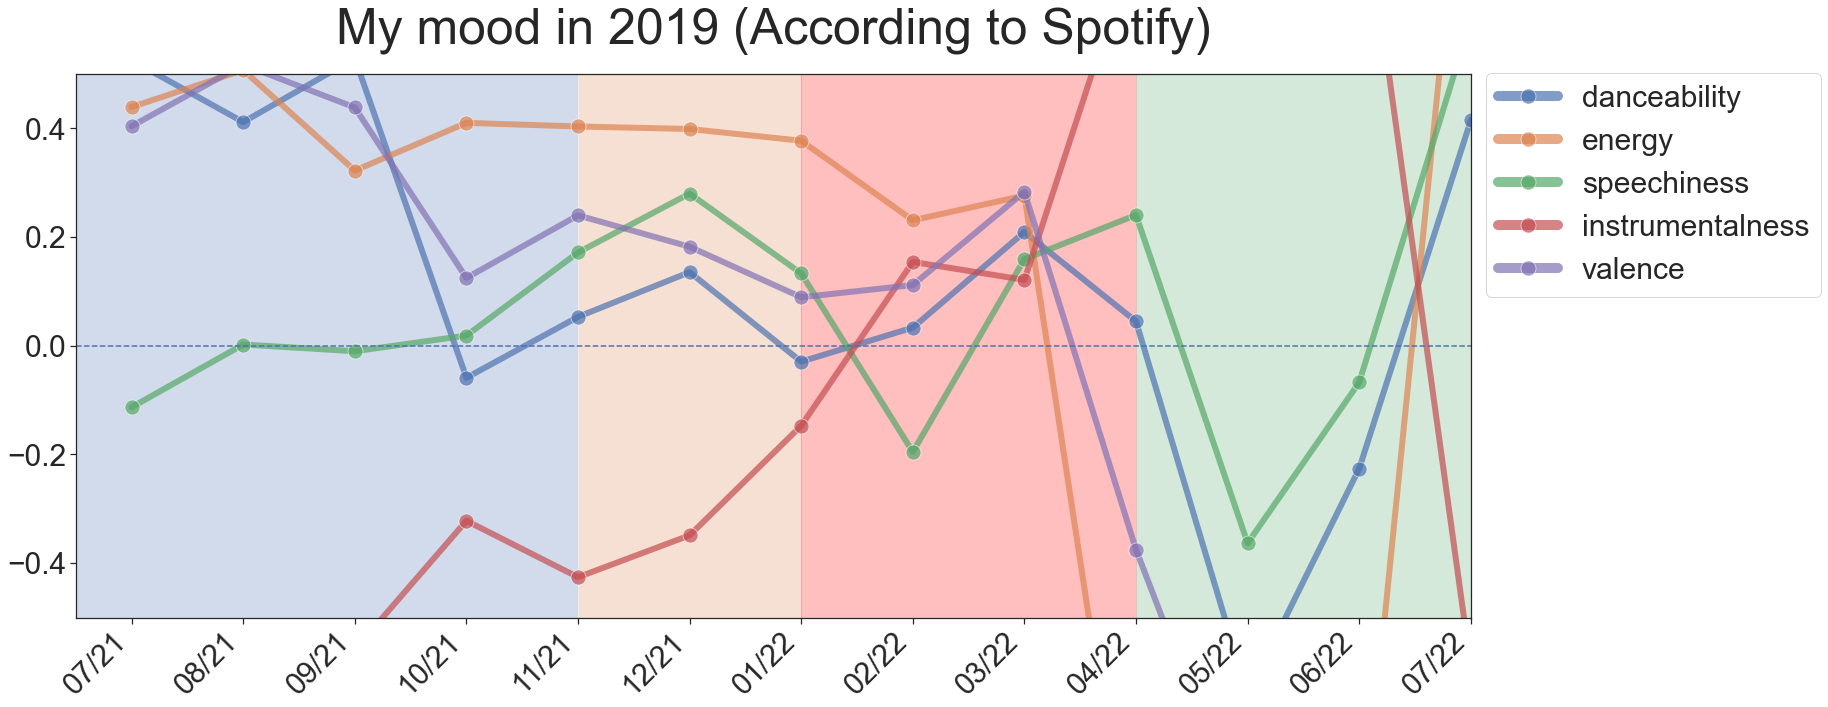

In [41]:
features_sns(['danceability', 'energy', 'speechiness', 'instrumentalness', 'valence'])
x = [-1] + [x for x in range(13)]
alpha = .25
plt.ylim([-.5, .5])
plt.xlim([-.5, 12])

plt.fill_between(x[:6], -.5, 0.5, alpha=alpha)
plt.fill_between(x[5:8], -.5, 0.5, alpha=alpha)
plt.fill_between(x[7:11], -.5, 0.5, alpha=alpha, color="red")
plt.fill_between(x[10:], -.5, 0.5, alpha=alpha)

# plt.annotate('Studying', (1, 0.4), size=35)
# plt.annotate('Graduating', (4.15, 0.4), size=35,)
# plt.annotate('Unemployed', (6.5, 0.4), size=35,)
# plt.annotate('First Job', (10.35, 0.4), size=35,)

plt.axhline(y=0, color='b', linestyle='--')


plt.show()